In [1]:
import glob

### full img counting
---

* full mammo img = 3103
* full calc img = 1511
* full mass img = 1592

In [8]:
full_path = glob.glob('../../DataSet/tcia_data/CBIS-DDSM/*/*/1.000000-full*/1-1.dcm')
full_calc_path = glob.glob('../../DataSet/tcia_data/CBIS-DDSM/Calc*/*/1.000000-full*/1-1.dcm')
full_mass_path = glob.glob('../../DataSet/tcia_data/CBIS-DDSM/Mass*/*/1.000000-full*/1-1.dcm')

In [9]:
len(full_path)

3103

In [10]:
len(full_calc_path)

1511

In [11]:
len(full_mass_path)

1592

In [13]:
full_dcm_path = glob.glob('../../DataSet/tcia_data/CBIS-DDSM/*/*/*/*')
len(full_dcm_path)

10239

In [23]:
roi_path = glob.glob('../../DataSet/tcia_data/CBIS-DDSM/*/*/1.000000-ROI*/1-2.dcm')
mask_path = glob.glob('../../DataSet/tcia_data/CBIS-DDSM/*/*/1.000000-ROI*/1-1.dcm')

In [24]:
len(roi_path)

3461

In [25]:
len(mask_path)

3565

In [46]:
a = glob.glob('../../DataSet/tcia_data/CBIS-DDSM/*/*/1.000000-full*/*')

In [47]:
len(a)

3103

In [48]:
b = glob.glob('../../DataSet/tcia_data/CBIS-DDSM/*/*/1.000000-ROI*/*')
len(b)

7026

In [80]:
c = glob.glob('../../DataSet/tcia_data/CBIS-DDSM/*/*/*/*')
len(c)

10239

In [71]:
c[0].split("\\")[-2].split(' ')[0]
c[0].split("\\")[-2].split(" ")

['1.000000-ROI', 'mask', 'images-18515']

In [82]:
cropped_img = []
for i in c:
    if i.split('\\')[-2].split(" ")[0] == '1.000000-ROI' :
        pass
    elif i.split("\\")[-2].split(' ')[0] == '1.000000-full':
        pass
    else:
        cropped_img.append(i)

In [84]:
cropped_img

['../../DataSet/tcia_data/CBIS-DDSM\\Calc-Training_P_00005_RIGHT_CC_1\\08-30-2017-DDSM-09081\\1.000000-cropped images-94682\\1-1.dcm',
 '../../DataSet/tcia_data/CBIS-DDSM\\Calc-Training_P_00005_RIGHT_CC_1\\08-30-2017-DDSM-09081\\1.000000-cropped images-94682\\1-2.dcm',
 '../../DataSet/tcia_data/CBIS-DDSM\\Calc-Training_P_00474_LEFT_MLO_1\\09-21-2017-DDSM-11708\\1.000000-cropped images-23803\\1-1.dcm',
 '../../DataSet/tcia_data/CBIS-DDSM\\Mass-Test_P_00016_LEFT_CC_1\\10-04-2016-DDSM-09887\\1.000000-cropped images-26184\\1-1.dcm',
 '../../DataSet/tcia_data/CBIS-DDSM\\Mass-Test_P_00016_LEFT_CC_1\\10-04-2016-DDSM-09887\\1.000000-cropped images-26184\\1-2.dcm',
 '../../DataSet/tcia_data/CBIS-DDSM\\Mass-Test_P_00016_LEFT_MLO_1\\10-04-2016-DDSM-15563\\1.000000-cropped images-77287\\1-1.dcm',
 '../../DataSet/tcia_data/CBIS-DDSM\\Mass-Test_P_00016_LEFT_MLO_1\\10-04-2016-DDSM-15563\\1.000000-cropped images-77287\\1-2.dcm',
 '../../DataSet/tcia_data/CBIS-DDSM\\Mass-Test_P_00145_LEFT_CC_1\\10-04-2

5112

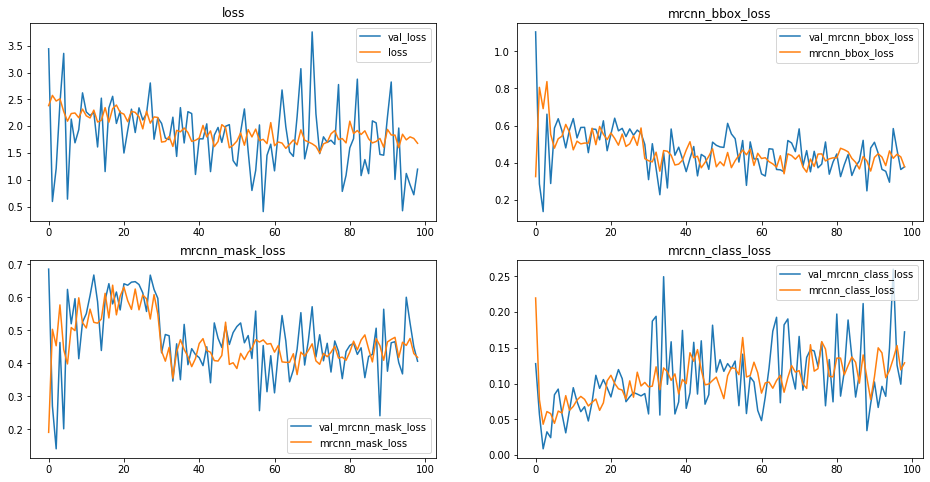

In [8]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

PATH_00 = r'D:\Gproject\205027_00_log.csv'
PATH_01 = r'D:\Gproject\205027_01_log.csv'
PATH_02 = r'D:\Gproject\205027_02_log.csv'

df_00 = pd.read_csv(PATH_00)
df_01 = pd.read_csv(PATH_01)
df_02 = pd.read_csv(PATH_02)

df_001 = pd.merge(df_00,df_01,how="outer")
df = pd.merge(df_001,df_02,how="outer")

plt.figure(figsize=(16,8))
plt.subplot(221)
plt.title("loss")
plt.plot(df["val_loss"],label = "val_loss")
plt.plot(df["loss"], label = "loss")
plt.legend()

plt.subplot(222)
plt.title("mrcnn_bbox_loss")
plt.plot(df["val_mrcnn_bbox_loss"],label = "val_mrcnn_bbox_loss")
plt.plot(df["mrcnn_bbox_loss"], label = "mrcnn_bbox_loss")
plt.legend()

plt.subplot(223)
plt.title("mrcnn_mask_loss")
plt.plot(df["val_mrcnn_mask_loss"],label = "val_mrcnn_mask_loss")
plt.plot(df["mrcnn_mask_loss"], label = "mrcnn_mask_loss")
plt.legend()

plt.subplot(224)
plt.title("mrcnn_class_loss")
plt.plot(df["val_mrcnn_class_loss"],label = "val_mrcnn_class_loss")
plt.plot(df["mrcnn_class_loss"], label = "mrcnn_class_loss")
plt.legend()

# Cropping

## Dataset :
### 1. Train(2362) : Calc(1221) \ Mass(1141)
### 2. Validation(525) : Calc(225) \ Mass(300)
### 3. Test(108) : Calc(58) \ Mass(50)

## Cropping 이전 width, height : (5246,3131)

## Cropping 평균 width, height : (3700,3131)

In [4]:
import glob
import cv2 as cv

PATH = r"E:\DataSet\CBIS-DDSM\Crop_train"
imgs = glob.glob(PATH + r"\*.png")
#len(imgs)

width_total = 0
height_total = 0 
for i in range(len(imgs)):
    img = cv.imread(imgs[i])
    
    width, height = img.shape[:2]
    width_total = width + width_total
    height_total = height + height_total
    
print("width tot : ",width_total/len(imgs))
print("height tot : ",height_total/len(imgs))

width tot :  3781.0179968701095
height tot :  3131.1324334898277


In [18]:
# Train
PATH = r"E:\DataSet\CBIS-DDSM\Crop_train"
imgs = glob.glob(PATH + r"\*full.png")
len(imgs)

2362

In [13]:
# Train_Calc
PATH = r"E:\DataSet\CBIS-DDSM\Crop_train"
imgs = glob.glob(PATH + r"\Calc*full.png")
len(imgs)

1221

In [14]:
# Train_Mass
PATH = r"E:\DataSet\CBIS-DDSM\Crop_train"
imgs = glob.glob(PATH + r"\Mass*full.png")
len(imgs)

1141

In [12]:
# Val
PATH = r"E:\DataSet\CBIS-DDSM\Crop_val"
imgs = glob.glob(PATH + r"\*full.png")
len(imgs)

525

In [19]:
# Val_Calc
PATH = r"E:\DataSet\CBIS-DDSM\Crop_val"
imgs = glob.glob(PATH + r"\Calc*full.png")
len(imgs)

225

In [20]:
# Val_Mass
PATH = r"E:\DataSet\CBIS-DDSM\Crop_val"
imgs = glob.glob(PATH + r"\Mass*full.png")
len(imgs)

300

In [11]:
# Test
PATH = r"E:\DataSet\CBIS-DDSM\Crop_test"
imgs = glob.glob(PATH + r"\*full.png")
len(imgs)

108

In [15]:
# Test_Calc
PATH = r"E:\DataSet\CBIS-DDSM\Crop_test"
imgs = glob.glob(PATH + r"\Calc*full.png")
len(imgs)

58

In [17]:
# Test_Mass
PATH = r"E:\DataSet\CBIS-DDSM\Crop_test"
imgs = glob.glob(PATH + r"\Mass*full.png")
len(imgs)

50

In [32]:
a = df.keys()
a

Index(['epoch', 'loss', 'mrcnn_bbox_loss', 'mrcnn_class_loss',
       'mrcnn_mask_loss', 'rpn_bbox_loss', 'rpn_class_loss', 'val_loss',
       'val_mrcnn_bbox_loss', 'val_mrcnn_class_loss', 'val_mrcnn_mask_loss',
       'val_rpn_bbox_loss', 'val_rpn_class_loss'],
      dtype='object')

In [1]:
# Cropping 100 epoch 후 Graph
import pandas as pd
import matplotlib.pyplot as plt
PATH_100 = r"D:\Gproject\Result\205030_00_log_Cropping_100epochs.csv"
PATH_200 = r"D:\Gproject\Result\205031_00_log_Cropping_200epochs.csv"
PATH_300 = r"D:\Gproject\Result\205031_00_log_Cropping_300epochs.csv"

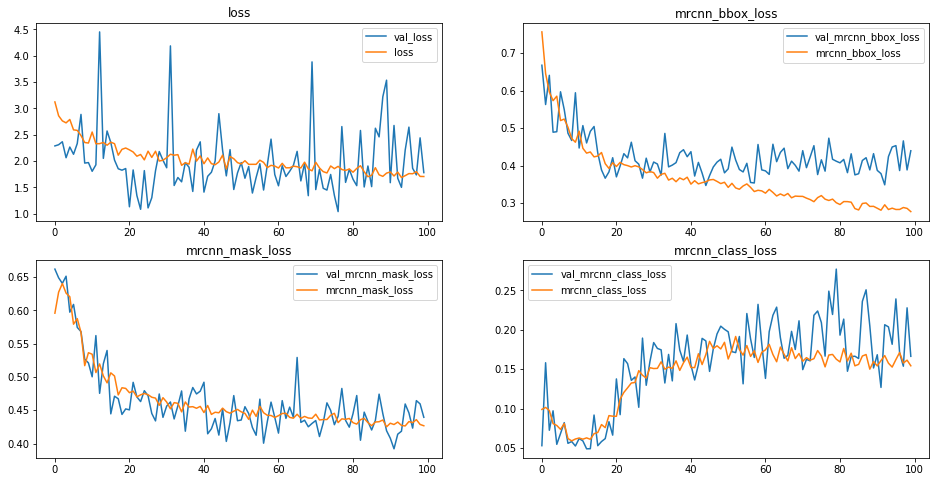

In [2]:
df_100 = pd.read_csv(PATH_100)


plt.figure(figsize=(16,8))
plt.subplot(221)
plt.title("loss")
plt.plot(df_100["val_loss"],label = "val_loss")
plt.plot(df_100["loss"], label = "loss")
plt.legend()

plt.subplot(222)
plt.title("mrcnn_bbox_loss")
plt.plot(df_100["val_mrcnn_bbox_loss"],label = "val_mrcnn_bbox_loss")
plt.plot(df_100["mrcnn_bbox_loss"], label = "mrcnn_bbox_loss")
plt.legend()

plt.subplot(223)
plt.title("mrcnn_mask_loss")
plt.plot(df_100["val_mrcnn_mask_loss"],label = "val_mrcnn_mask_loss")
plt.plot(df_100["mrcnn_mask_loss"], label = "mrcnn_mask_loss")
plt.legend()

plt.subplot(224)
plt.title("mrcnn_class_loss")
plt.plot(df_100["val_mrcnn_class_loss"],label = "val_mrcnn_class_loss")
plt.plot(df_100["mrcnn_class_loss"], label = "mrcnn_class_loss")
plt.legend()

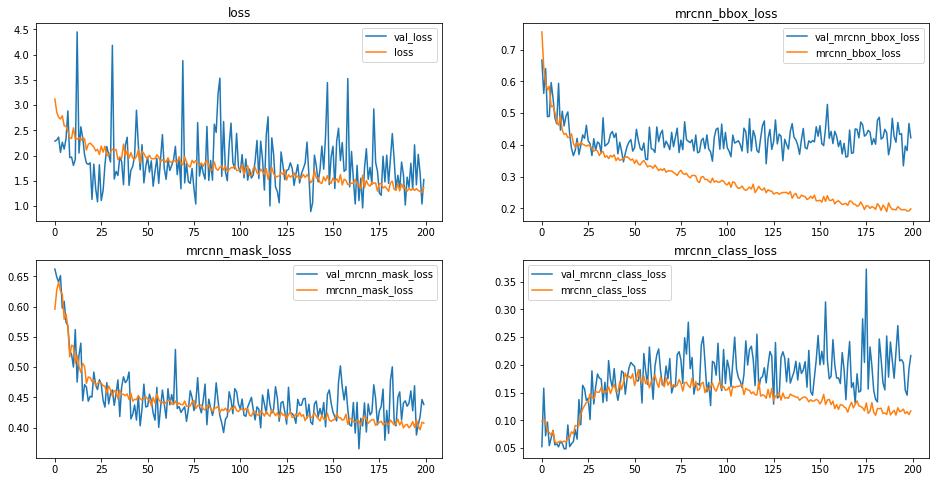

In [3]:
# Cropping 200 epoch 후 Graph
df_200 = pd.read_csv(PATH_200)
df_total = pd.merge(df_100,df_200,how= 'outer')

plt.figure(figsize=(16,8))
plt.subplot(221)
plt.title("loss")
plt.plot(df_total["val_loss"],label = "val_loss")
plt.plot(df_total["loss"], label = "loss")
plt.legend()

plt.subplot(222)
plt.title("mrcnn_bbox_loss")
plt.plot(df_total["val_mrcnn_bbox_loss"],label = "val_mrcnn_bbox_loss")
plt.plot(df_total["mrcnn_bbox_loss"], label = "mrcnn_bbox_loss")
plt.legend()

plt.subplot(223)
plt.title("mrcnn_mask_loss")
plt.plot(df_total["val_mrcnn_mask_loss"],label = "val_mrcnn_mask_loss")
plt.plot(df_total["mrcnn_mask_loss"], label = "mrcnn_mask_loss")
plt.legend()

plt.subplot(224)
plt.title("mrcnn_class_loss")
plt.plot(df_total["val_mrcnn_class_loss"],label = "val_mrcnn_class_loss")
plt.plot(df_total["mrcnn_class_loss"], label = "mrcnn_class_loss")
plt.legend()

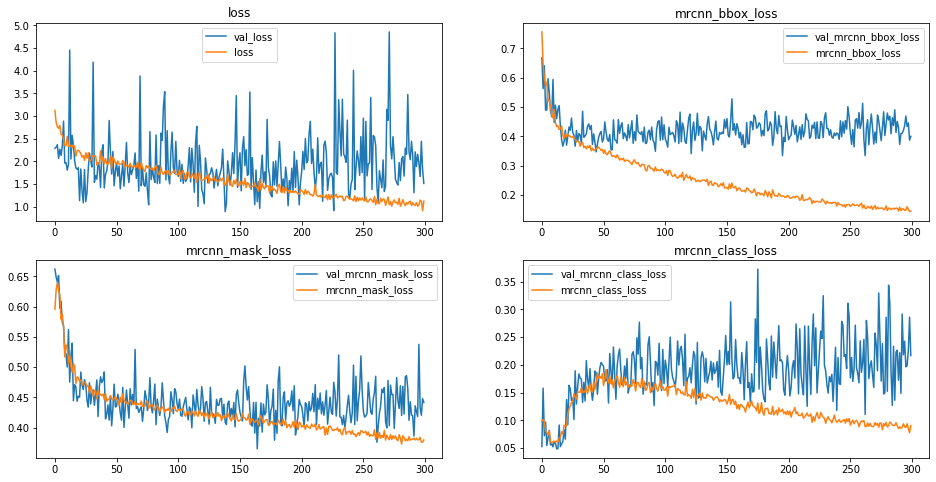

In [6]:
# Cropping 200 epoch 후 Graph
PATH = r"D:\Gproject\Result\200604_00_log_Cropping_300epochs.csv"
df_300 = pd.read_csv(PATH)
df_total = pd.merge(df_total,df_300,how= 'outer')

plt.figure(figsize=(16,8))
plt.subplot(221)
plt.title("loss")
plt.plot(df_total["val_loss"],label = "val_loss")
plt.plot(df_total["loss"], label = "loss")
plt.legend()

plt.subplot(222)
plt.title("mrcnn_bbox_loss")
plt.plot(df_total["val_mrcnn_bbox_loss"],label = "val_mrcnn_bbox_loss")
plt.plot(df_total["mrcnn_bbox_loss"], label = "mrcnn_bbox_loss")
plt.legend()

plt.subplot(223)
plt.title("mrcnn_mask_loss")
plt.plot(df_total["val_mrcnn_mask_loss"],label = "val_mrcnn_mask_loss")
plt.plot(df_total["mrcnn_mask_loss"], label = "mrcnn_mask_loss")
plt.legend()

plt.subplot(224)
plt.title("mrcnn_class_loss")
plt.plot(df_total["val_mrcnn_class_loss"],label = "val_mrcnn_class_loss")
plt.plot(df_total["mrcnn_class_loss"], label = "mrcnn_class_loss")
plt.legend()